In [488]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from nltk.corpus import stopwords 
from nltk.tokenize import word_tokenize
import nltk
nltk.download('stopwords')
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import copy
from textblob import TextBlob
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
from sklearn.utils import resample
from wordcloud import WordCloud
import re
from sklearn.ensemble import GradientBoostingClassifier
re.compile('<title>(.*)</title>')
from sklearn.linear_model import LogisticRegression

[nltk_data] Downloading package stopwords to /home/dhawal/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/dhawal/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/dhawal/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [489]:
df = pd.read_csv("merge_zomato.csv")
# col=df.columns

In [490]:
df
df=df[['text','stars','oneword']]
# df

In [491]:
# df=df.drop(['Unnamed: 10','Unnamed: 11','review_id','date'],axis=1)

# df=df.drop(['user_id','business_id','type'],axis=1)

## UPSAMPLE

In [492]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
stemmer

### Coversion in lower case ###

In [493]:
df['text'] = df['text'].str.lower()

### Removal of stop words

In [494]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

stop=stop[0:144]
stop.append('back')
stop.append('n\'t')
stop.append('dice')

In [495]:
df['text']
df['text'] = df['text'].str.replace('[^\w\s#@/:%.,_-]', '', flags=re.UNICODE)

In [496]:
# df

In [497]:
 df.select_dtypes(include=['float64'])

,stars
0,5.0
1,1.0
2,5.0
3,5.0
4,5.0
5,1.0
6,5.0
7,5.0
8,3.0
9,3.0


In [498]:
df.dtypes

text        object
stars      float64
oneword     object
dtype: object

### Exclude stopwords with Python's list comprehension and pandas.DataFrame.apply.

In [499]:
# df['text'].dropna
# df.dropna(how='all')

In [500]:
# df['text']=df['text'].notnull()
# df.isnull().values.any()
# nan_rows = df[df['text'].isnull()]
# nan_rows
# df=df[bdf['text'].notnull()]


In [501]:
df=df.dropna()

In [502]:
df

,text,stars,oneword
0,about 5 minutes walk from kankurgachi bus stop...,5.0,Insane!
1,cheap quality food. ordered food from zomato. ...,1.0,Avoid!
2,"as the name suggests, this is a compact and wh...",5.0,Insane!
3,kankurgachi dhaba is located at a 5-8min walki...,5.0,Insane!
4,kakurgachi dhaaba is a hidden gem located at k...,5.0,Insane!
5,too much poor service. we have asked for bar m...,1.0,Avoid!
6,had a great time with family on the saturday l...,5.0,Insane!
7,it was sumana thanks. for. gr8 service i wa...,5.0,Insane!
8,...finally m reviewing the jw marriott ...it i...,3.0,Average
9,dinner after a good discussion is quite a task...,3.0,Average


In [503]:
nan_rows = df[df['stars'].isnull()]

In [504]:
# df=df.drop(df.index[nan_rows])

In [505]:
nan_rows

,text,stars,oneword


In [506]:
df['text'] = df['text'].apply(lambda x:' '.join([word for word in x.split() if word not in (stop)]))

#### INCLUSION OF LENGTH OF REVIEW

In [507]:
df['length'] = df['text'].apply(len)

### Review vs Stars

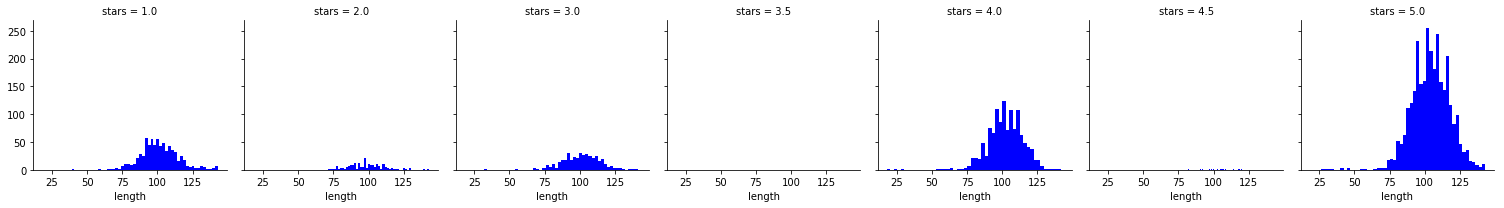

In [508]:
graph = sns.FacetGrid(data=df,col='stars')
graph.map(plt.hist,'length',bins=50,color='blue')

#### Removal of meaningless thing from text

In [509]:
def fun(x):
#     print(x)
    blob=TextBlob(x)
#     print("blob ",blob)
    verb=[]
    s=" "
    for word, tag in blob.tags:
#         print("ffff")
        if tag == 'RB' or tag=='RBR' or tag=='RBS' or tag=='JJ' or tag=='JJR':
            verb.append(word)
    s=s.join(verb)
    return s

In [510]:
def plot_word_cloud(data):
    '''
    Function to plot word cloud from a pandas series
    Input: data: pandas.core.series.Series object
    Output: Wordcloud of most recurrent words in data
        for plots to be in ipython notebook include following line before calling this function
        %matplotlib inline 
    '''
    # take relative word frequencies into account, lower max_font_size
    wordcloud = WordCloud(max_font_size=40, relative_scaling=.5).generate(str(data))
    plt.figure()
    plt.imshow(wordcloud)
    plt.axis("off")
    plt.show()

In [511]:
df

,text,stars,oneword,length
0,"5 minutes walk kankurgachi bus stop, primarily...",5.0,Insane!,114
1,cheap quality food. ordered food zomato. food ...,1.0,Avoid!,103
2,"name suggests, compact wholesome eatery locate...",5.0,Insane!,108
3,kankurgachi dhaba located 5-8min walking dista...,5.0,Insane!,112
4,kakurgachi dhaaba hidden gem located kankurgac...,5.0,Insane!,105
5,much poor service. asked bar menu 3 times got ...,1.0,Avoid!,80
6,great time family saturday lunch. huge spread ...,5.0,Insane!,99
7,sumana thanks. for. gr8 service highly oblige....,5.0,Insane!,101
8,...finally reviewing jw marriott ...it great h...,3.0,Average,118
9,dinner good discussion quite task. jw kitchen ...,3.0,Average,100


In [512]:
df=df.reset_index()
df

,index,text,stars,oneword,length
0,0,"5 minutes walk kankurgachi bus stop, primarily...",5.0,Insane!,114
1,1,cheap quality food. ordered food zomato. food ...,1.0,Avoid!,103
2,2,"name suggests, compact wholesome eatery locate...",5.0,Insane!,108
3,3,kankurgachi dhaba located 5-8min walking dista...,5.0,Insane!,112
4,4,kakurgachi dhaaba hidden gem located kankurgac...,5.0,Insane!,105
5,5,much poor service. asked bar menu 3 times got ...,1.0,Avoid!,80
6,6,great time family saturday lunch. huge spread ...,5.0,Insane!,99
7,7,sumana thanks. for. gr8 service highly oblige....,5.0,Insane!,101
8,8,...finally reviewing jw marriott ...it great h...,3.0,Average,118
9,9,dinner good discussion quite task. jw kitchen ...,3.0,Average,100


In [513]:
df=df.drop(['index'],axis=1)

In [514]:
df

,text,stars,oneword,length
0,"5 minutes walk kankurgachi bus stop, primarily...",5.0,Insane!,114
1,cheap quality food. ordered food zomato. food ...,1.0,Avoid!,103
2,"name suggests, compact wholesome eatery locate...",5.0,Insane!,108
3,kankurgachi dhaba located 5-8min walking dista...,5.0,Insane!,112
4,kakurgachi dhaaba hidden gem located kankurgac...,5.0,Insane!,105
5,much poor service. asked bar menu 3 times got ...,1.0,Avoid!,80
6,great time family saturday lunch. huge spread ...,5.0,Insane!,99
7,sumana thanks. for. gr8 service highly oblige....,5.0,Insane!,101
8,...finally reviewing jw marriott ...it great h...,3.0,Average,118
9,dinner good discussion quite task. jw kitchen ...,3.0,Average,100


In [515]:
df['text'] = df['text'].apply(fun)

# strv=df.groupby('stars').mean()
# stval.corr()
# strv.mean('cool')
# strv

# strv.corr()

### STEMMING

In [516]:
df['text'] = df['text'].apply(lambda x:' '.join([stemmer.stem(word) for word in x.split() if word in stemmer.stem(word)]))

In [517]:
df['text'] = df['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

In [518]:
texts = df['text']
stars = df['stars']

In [519]:
print(len(texts))

5601


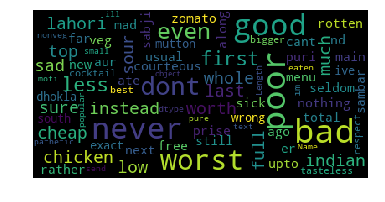

In [520]:
plot_word_cloud(df["text"].loc[df.stars == 1,])

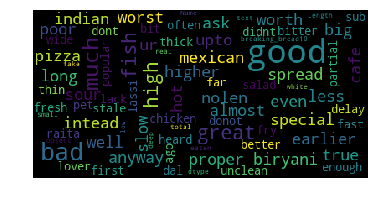

In [521]:
plot_word_cloud(df["text"].loc[df.stars == 2,])

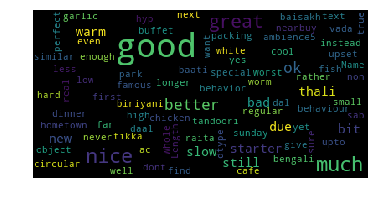

In [522]:
plot_word_cloud(df["text"].loc[df.stars == 3,])

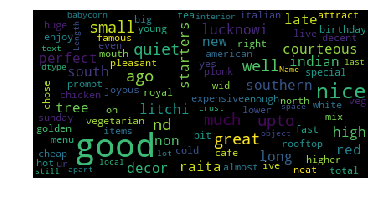

In [523]:
plot_word_cloud(df["text"].loc[df.stars == 4,])

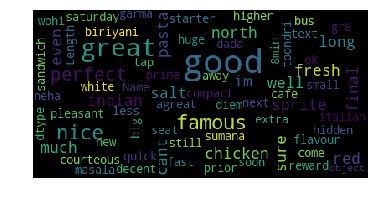

In [524]:
plot_word_cloud(df["text"].loc[df.stars == 5,])

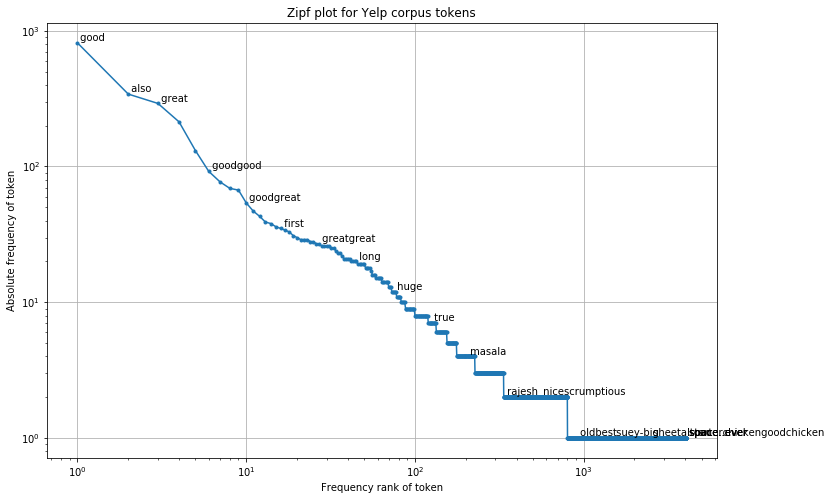

In [525]:
yelp_review_tokens = df.text.sum()
yelp_review_vocabulary = nltk.FreqDist(yelp_review_tokens.split())
yelp_review_vocabulary_counts = np.array(list(yelp_review_vocabulary.values()))
yelp_review_vocabulary_tokens = list(yelp_review_vocabulary.keys())

# A Zipf plot
ranks = np.arange(1, len(yelp_review_vocabulary_counts)+1)
indices = np.argsort(-yelp_review_vocabulary_counts)
frequencies = yelp_review_vocabulary_counts[indices]
fig3 = plt.figure(figsize=(12, 8))
plt.loglog(ranks, frequencies, marker=".")
plt.title("Zipf plot for Yelp corpus tokens")
plt.xlabel("Frequency rank of token")
plt.ylabel("Absolute frequency of token")
plt.grid(True)
for n in list(np.logspace(-0.5, np.log10(len(yelp_review_vocabulary_counts)), 20).astype(int)):
    dummy = plt.text(ranks[n-1], frequencies[n-1], " " + yelp_review_vocabulary_tokens[indices[n-1]], 
                 verticalalignment="bottom",
                 horizontalalignment="left")

In [526]:
dict1={}
dict1[1]=[]
dict1[2]=[]
dict1[3]=[]
dict1[4]=[]
dict1[5]=[]

In [527]:
nan_rows = df[df['stars'].isnull()]
nan_rows

,text,stars,oneword,length


In [528]:
df

,text,stars,oneword,length
0,small north indian,5.0,Insane!,114
1,cheap low low also,1.0,Avoid!,103
2,compact north indian,5.0,Insane!,108
3,5-8min bus,5.0,Insane!,112
4,hidden much,5.0,Insane!,105
5,much poor menu next,1.0,Avoid!,80
6,great saturday huge,5.0,Insane!,99
7,sumana gr8 seat,5.0,Insane!,101
8,great hyp,3.0,Average,118
9,dinner good u,3.0,Average,100


In [529]:
# df['stars']
nan_rows = df[df['stars'].isnull()]
nan_rows

,text,stars,oneword,length


In [530]:
df['stars']

0       5.0
1       1.0
2       5.0
3       5.0
4       5.0
5       1.0
6       5.0
7       5.0
8       3.0
9       3.0
10      5.0
11      5.0
12      5.0
13      5.0
14      3.0
15      5.0
16      5.0
17      5.0
18      3.0
19      5.0
20      5.0
21      5.0
22      5.0
23      3.0
24      5.0
25      5.0
26      5.0
27      3.0
28      5.0
29      5.0
       ... 
5571    4.0
5572    1.0
5573    4.0
5574    5.0
5575    5.0
5576    5.0
5577    5.0
5578    5.0
5579    5.0
5580    3.0
5581    4.0
5582    4.0
5583    1.0
5584    4.0
5585    1.0
5586    4.0
5587    4.0
5588    5.0
5589    1.0
5590    3.0
5591    5.0
5592    5.0
5593    1.0
5594    4.0
5595    1.0
5596    1.0
5597    5.0
5598    4.0
5599    4.0
5600    2.0
Name: stars, Length: 5601, dtype: float64

In [531]:
positive=0
negative=0
count=0
#polarity and star graph 

for i in df['text']:
    blob = TextBlob(i)
    feel = blob.sentiment
    if feel.polarity > 0:
        positive = positive + 1
    else:
        negative = negative + 1
    if(feel.polarity<0.10):
        df.loc[count, 'sentiment'] = int(1)
    elif(feel.polarity>=0.10 and feel.polarity < 0.16):
        df.loc[count, 'sentiment'] = int(2)
    elif(feel.polarity>=0.16 and feel.polarity < 0.025):
        df.loc[count, 'sentiment'] = int(3)
    elif(feel.polarity>=0.025 and feel.polarity < 0.35):
        df.loc[count, 'sentiment'] = int(4)
    else:
        df.loc[count, 'sentiment'] = int(5)
    w=df.loc[count, 'stars']
#     print(w)
    if w=='NaN':
        print(i)
    print(w,count)
    dict1[int(w)].append(feel.polarity)
    count=count+1

5.0 0
1.0 1
5.0 2
5.0 3
5.0 4
1.0 5
5.0 6
5.0 7
3.0 8
3.0 9
5.0 10
5.0 11
5.0 12
5.0 13
3.0 14
5.0 15
5.0 16
5.0 17
3.0 18
5.0 19
5.0 20
5.0 21
5.0 22
3.0 23
5.0 24
5.0 25
5.0 26
3.0 27
5.0 28
5.0 29
5.0 30
3.0 31
5.0 32
5.0 33
1.0 34
4.0 35
4.0 36
4.0 37
5.0 38
4.0 39
3.0 40
4.0 41
5.0 42
4.0 43
5.0 44
5.0 45
2.0 46
3.0 47
5.0 48
5.0 49
3.0 50
4.0 51
4.0 52
5.0 53
5.0 54
4.0 55
5.0 56
4.0 57
5.0 58
5.0 59
5.0 60
5.0 61
4.0 62
5.0 63
5.0 64
4.0 65
5.0 66
4.0 67
4.0 68
4.0 69
4.0 70
1.0 71
5.0 72
5.0 73
5.0 74
5.0 75
5.0 76
5.0 77
5.0 78
4.0 79
5.0 80
5.0 81
4.0 82
5.0 83
5.0 84
5.0 85
5.0 86
1.0 87
4.0 88
5.0 89
5.0 90
5.0 91
5.0 92
1.0 93
5.0 94
4.5 95
5.0 96
5.0 97
5.0 98
5.0 99
5.0 100
5.0 101
4.0 102
2.0 103
5.0 104
4.0 105
5.0 106
5.0 107
4.0 108
4.0 109
4.0 110
5.0 111
4.0 112
2.0 113
5.0 114
4.0 115
5.0 116
5.0 117
4.0 118
4.0 119
4.0 120
5.0 121
5.0 122
5.0 123
5.0 124
3.0 125
5.0 126
4.0 127
5.0 128
3.0 129
4.0 130
5.0 131
1.0 132
5.0 133
1.0 134
1.0 135
1.0 136
4.0 137
1.0 13

5.0 1059
5.0 1060
5.0 1061
3.0 1062
4.0 1063
1.0 1064
1.0 1065
1.0 1066
4.0 1067
4.0 1068
5.0 1069
5.0 1070
4.0 1071
4.0 1072
5.0 1073
5.0 1074
4.5 1075
5.0 1076
4.0 1077
4.0 1078
5.0 1079
5.0 1080
5.0 1081
5.0 1082
5.0 1083
5.0 1084
5.0 1085
5.0 1086
5.0 1087
5.0 1088
5.0 1089
5.0 1090
5.0 1091
5.0 1092
5.0 1093
5.0 1094
5.0 1095
5.0 1096
5.0 1097
5.0 1098
5.0 1099
5.0 1100
5.0 1101
2.0 1102
5.0 1103
5.0 1104
2.0 1105
5.0 1106
4.0 1107
5.0 1108
5.0 1109
3.0 1110
5.0 1111
5.0 1112
5.0 1113
5.0 1114
5.0 1115
5.0 1116
4.0 1117
5.0 1118
1.0 1119
4.0 1120
1.0 1121
5.0 1122
5.0 1123
3.0 1124
3.0 1125
4.0 1126
3.0 1127
5.0 1128
3.0 1129
5.0 1130
5.0 1131
3.0 1132
5.0 1133
5.0 1134
5.0 1135
5.0 1136
5.0 1137
5.0 1138
5.0 1139
5.0 1140
5.0 1141
4.0 1142
5.0 1143
5.0 1144
5.0 1145
5.0 1146
5.0 1147
5.0 1148
5.0 1149
5.0 1150
5.0 1151
5.0 1152
5.0 1153
5.0 1154
5.0 1155
5.0 1156
5.0 1157
5.0 1158
5.0 1159
5.0 1160
5.0 1161
5.0 1162
5.0 1163
4.0 1164
5.0 1165
5.0 1166
5.0 1167
5.0 1168
5.0 1169
5

4.0 2054
4.0 2055
5.0 2056
5.0 2057
5.0 2058
5.0 2059
5.0 2060
5.0 2061
4.0 2062
4.0 2063
4.0 2064
5.0 2065
5.0 2066
5.0 2067
5.0 2068
5.0 2069
3.0 2070
3.0 2071
4.0 2072
5.0 2073
4.0 2074
4.0 2075
1.0 2076
4.0 2077
5.0 2078
4.0 2079
5.0 2080
5.0 2081
5.0 2082
4.0 2083
5.0 2084
5.0 2085
4.0 2086
5.0 2087
5.0 2088
5.0 2089
5.0 2090
4.0 2091
5.0 2092
5.0 2093
4.0 2094
5.0 2095
5.0 2096
5.0 2097
5.0 2098
5.0 2099
5.0 2100
5.0 2101
4.0 2102
5.0 2103
5.0 2104
5.0 2105
5.0 2106
5.0 2107
5.0 2108
4.0 2109
5.0 2110
5.0 2111
5.0 2112
5.0 2113
5.0 2114
5.0 2115
4.0 2116
5.0 2117
5.0 2118
5.0 2119
3.0 2120
5.0 2121
5.0 2122
5.0 2123
5.0 2124
5.0 2125
5.0 2126
5.0 2127
5.0 2128
5.0 2129
3.0 2130
5.0 2131
5.0 2132
5.0 2133
5.0 2134
5.0 2135
5.0 2136
3.0 2137
2.0 2138
5.0 2139
5.0 2140
5.0 2141
1.0 2142
1.0 2143
1.0 2144
5.0 2145
5.0 2146
3.0 2147
2.0 2148
5.0 2149
5.0 2150
5.0 2151
1.0 2152
1.0 2153
1.0 2154
5.0 2155
5.0 2156
4.0 2157
5.0 2158
5.0 2159
5.0 2160
5.0 2161
5.0 2162
5.0 2163
4.0 2164
3

5.0 3065
5.0 3066
5.0 3067
1.0 3068
5.0 3069
1.0 3070
5.0 3071
4.0 3072
2.0 3073
5.0 3074
5.0 3075
5.0 3076
1.0 3077
4.0 3078
4.0 3079
4.0 3080
5.0 3081
4.0 3082
4.0 3083
5.0 3084
4.0 3085
3.0 3086
5.0 3087
1.0 3088
5.0 3089
4.0 3090
5.0 3091
4.0 3092
5.0 3093
5.0 3094
5.0 3095
5.0 3096
3.0 3097
5.0 3098
5.0 3099
5.0 3100
5.0 3101
4.0 3102
5.0 3103
5.0 3104
4.0 3105
5.0 3106
4.0 3107
5.0 3108
4.0 3109
5.0 3110
5.0 3111
5.0 3112
5.0 3113
4.0 3114
5.0 3115
5.0 3116
5.0 3117
1.0 3118
4.0 3119
2.0 3120
5.0 3121
5.0 3122
5.0 3123
4.0 3124
4.0 3125
4.0 3126
5.0 3127
1.0 3128
5.0 3129
5.0 3130
5.0 3131
3.0 3132
5.0 3133
5.0 3134
4.0 3135
5.0 3136
5.0 3137
4.0 3138
5.0 3139
5.0 3140
4.0 3141
5.0 3142
5.0 3143
5.0 3144
5.0 3145
5.0 3146
5.0 3147
5.0 3148
5.0 3149
5.0 3150
5.0 3151
5.0 3152
5.0 3153
5.0 3154
5.0 3155
1.0 3156
5.0 3157
5.0 3158
5.0 3159
5.0 3160
5.0 3161
5.0 3162
5.0 3163
5.0 3164
5.0 3165
5.0 3166
5.0 3167
5.0 3168
4.0 3169
5.0 3170
5.0 3171
4.0 3172
5.0 3173
3.0 3174
4.0 3175
1

4.0 4074
1.0 4075
5.0 4076
1.0 4077
5.0 4078
5.0 4079
5.0 4080
3.0 4081
5.0 4082
5.0 4083
5.0 4084
4.0 4085
5.0 4086
4.0 4087
3.0 4088
5.0 4089
5.0 4090
5.0 4091
5.0 4092
5.0 4093
5.0 4094
5.0 4095
1.0 4096
4.0 4097
1.0 4098
4.0 4099
4.0 4100
5.0 4101
4.0 4102
4.0 4103
4.0 4104
1.0 4105
5.0 4106
5.0 4107
3.0 4108
5.0 4109
5.0 4110
1.0 4111
3.0 4112
1.0 4113
1.0 4114
5.0 4115
5.0 4116
5.0 4117
5.0 4118
5.0 4119
5.0 4120
3.0 4121
1.0 4122
3.0 4123
1.0 4124
1.0 4125
5.0 4126
4.0 4127
5.0 4128
1.0 4129
4.0 4130
1.0 4131
3.0 4132
1.0 4133
5.0 4134
1.0 4135
2.0 4136
5.0 4137
4.0 4138
4.0 4139
5.0 4140
5.0 4141
5.0 4142
5.0 4143
1.0 4144
4.0 4145
1.0 4146
3.0 4147
4.0 4148
1.0 4149
4.0 4150
1.0 4151
2.0 4152
5.0 4153
5.0 4154
1.0 4155
5.0 4156
5.0 4157
4.0 4158
1.0 4159
5.0 4160
4.0 4161
5.0 4162
5.0 4163
5.0 4164
5.0 4165
5.0 4166
5.0 4167
3.0 4168
3.0 4169
4.0 4170
4.0 4171
3.0 4172
4.0 4173
1.0 4174
3.0 4175
4.0 4176
4.0 4177
4.0 4178
5.0 4179
4.0 4180
4.0 4181
1.0 4182
5.0 4183
1.0 4184
1

1.0 5034
1.0 5035
4.0 5036
1.0 5037
4.0 5038
4.0 5039
1.0 5040
4.0 5041
4.0 5042
5.0 5043
5.0 5044
4.0 5045
1.0 5046
1.0 5047
5.0 5048
2.0 5049
2.0 5050
5.0 5051
5.0 5052
5.0 5053
1.0 5054
2.0 5055
4.0 5056
5.0 5057
2.0 5058
1.0 5059
1.0 5060
1.0 5061
5.0 5062
1.0 5063
1.0 5064
4.0 5065
5.0 5066
1.0 5067
1.0 5068
1.0 5069
1.0 5070
5.0 5071
4.0 5072
4.0 5073
5.0 5074
4.0 5075
5.0 5076
4.0 5077
1.0 5078
2.0 5079
3.0 5080
5.0 5081
2.0 5082
1.0 5083
1.0 5084
3.0 5085
1.0 5086
5.0 5087
3.0 5088
1.0 5089
5.0 5090
1.0 5091
5.0 5092
5.0 5093
5.0 5094
1.0 5095
4.0 5096
1.0 5097
3.0 5098
5.0 5099
1.0 5100
5.0 5101
1.0 5102
1.0 5103
3.0 5104
5.0 5105
1.0 5106
1.0 5107
2.0 5108
1.0 5109
1.0 5110
5.0 5111
5.0 5112
1.0 5113
4.0 5114
2.0 5115
1.0 5116
5.0 5117
4.0 5118
2.0 5119
1.0 5120
5.0 5121
1.0 5122
2.0 5123
1.0 5124
3.0 5125
4.0 5126
5.0 5127
2.0 5128
4.0 5129
5.0 5130
1.0 5131
4.0 5132
2.0 5133
1.0 5134
4.0 5135
2.0 5136
3.0 5137
4.0 5138
4.0 5139
3.0 5140
3.0 5141
4.0 5142
5.0 5143
5.0 5144
1

In [532]:
nan_rows = df[df['stars'].isnull()]
nan_rows

,text,stars,oneword,length,sentiment


In [533]:
import matplotlib.pyplot as plt
x = [1,2,3,4,5]
y = list(dict1.values())
y

[[0.13333333333333333,
  -0.2,
  0.0,
  0.0,
  0.0,
  0.0,
  0.0,
  3.700743415417188e-17,
  0.5,
  -0.15000000000000002,
  0.0,
  0.09999999999999999,
  -0.625,
  0.13636363636363635,
  0.0,
  0.13333333333333333,
  0.0,
  -0.25,
  0.0,
  -0.5999999999999999,
  0.5,
  0.0,
  -0.6999999999999998,
  0.7,
  -0.05000000000000002,
  -0.05000000000000002,
  0.0,
  0.6,
  0.0,
  0.0,
  0.7,
  0.7,
  0.3,
  0.1,
  0.1,
  -0.8499999999999999,
  0.4000000000000001,
  0.4000000000000001,
  -0.125,
  0.0,
  0.0,
  -0.16428571428571426,
  0.1,
  -0.15,
  0.1,
  -0.15,
  -0.4,
  -0.25,
  -0.6,
  -0.6999999999999998,
  0.0,
  0.0,
  0.0,
  0.2583333333333333,
  -0.6999999999999998,
  0.0,
  -0.6999999999999998,
  0.4,
  -0.49999999999999994,
  0.0,
  -0.6999999999999998,
  0.4,
  -0.49999999999999994,
  0.7,
  0.7,
  -0.6,
  0.0,
  0.0,
  -0.3499999999999999,
  0.0,
  0.0,
  -0.3499999999999999,
  0.0,
  0.5,
  -0.5,
  4.4408920985006264e-17,
  0.0,
  0.0,
  0.425,
  0.0,
  0.6,
  0.7,
  -0.4,
  0.4

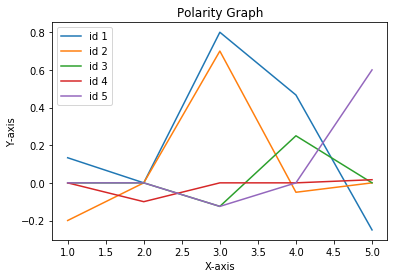

In [534]:
plt.xlabel("X-axis")
plt.ylabel("Y-axis")
plt.title("Polarity Graph")
for i in range(len(y)):
    plt.plot(x,[pt[i] for pt in y],label = 'id %s'%(i+1))
plt.legend()
plt.show()

#### REASON FOR BALANCING CAN BE SEEN BY GRAPH SHOWING VARIATION IN COLLECTION OF RATING COUNT ###$

In [535]:
# stars_1 = df[df['stars']==1]
# stars_2 = df[df['stars']==2]
# stars_3 = df[df['stars']==3]
# stars_5 = df[df['stars']==5]
# stars_4 = df[df['stars']==4]

# df_minority_upsampled_1 = resample(stars_1, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_2 = resample(stars_2, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_3 = resample(stars_3, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_minority_upsampled_5 = resample(stars_5, 
#                                  replace=True, 
#                                  n_samples=3526,
#                                  random_state=123)
# df_upsampled = pd.concat([stars_4, df_minority_upsampled_1,df_minority_upsampled_2,df_minority_upsampled_3,df_minority_upsampled_5])

we’ll get less biased predictions if we train the system on balanced data. This means that ideally we should have the same number of examples of each review type.

In [536]:
# N_star_categories = 5
# colors = np.array(['#660000', '#ff4d4d', '#ffb3b3', '#99e699', '#29a329'])
# stars_labels = np.array(range(N_star_categories)) + 1;
# #star_category_dist_fig = plt.figure(figsize=(12,8))
# bar_plot_indices = np.arange(N_star_categories) 
# star_category_absolute_frequencies = df_upsampled.stars.value_counts(ascending=True);
# star_category_relative_frequencies = np.array(star_category_absolute_frequencies)/float(sum(star_category_absolute_frequencies))
# sns.set()
# sns.set(style="white")
# fig2 = plt.figure(figsize=(12, 8))
# ax = sns.barplot(x=bar_plot_indices + 1, y=star_category_relative_frequencies)
# ax.set_xlabel('Star Category');
# ax.set_ylabel('Relative Frequency');
# ax.set_title('Star Category Distribution for {0} Reviews'.format(len(df_upsampled)));

In [537]:
stars = df['stars']
print(Counter(stars))
balanced_y = stars
balanced_x = df['text']

Counter({5.0: 3021, 4.0: 1225, 1.0: 731, 3.0: 407, 2.0: 201, 4.5: 15, 3.5: 1})


In [538]:
# df_upsampled
# df_upsampled.reset_index()

balanced_y=df['stars'].round(0).astype(int)

### Data bais

In [539]:
# bow_transformer = CountVectorizer(analyzer=text_process).fit(X_train)
# df_upsampled = df_upsampled.loc[:,~df_upsampled.columns.duplicated()]

In [540]:
# df_upsampled
# df_upsampled.reset_index()

In [541]:
df2=df[['sentiment','text','stars','oneword']]


In [542]:
df2

,sentiment,text,stars,oneword
0,1.0,small north indian,5.0,Insane!
1,2.0,cheap low low also,1.0,Avoid!
2,1.0,compact north indian,5.0,Insane!
3,1.0,5-8min bus,5.0,Insane!
4,1.0,hidden much,5.0,Insane!
5,1.0,much poor menu next,1.0,Avoid!
6,5.0,great saturday huge,5.0,Insane!
7,1.0,sumana gr8 seat,5.0,Insane!
8,5.0,great hyp,3.0,Average
9,5.0,dinner good u,3.0,Average


In [543]:
# df2.groupby('stars', as_index=False)['sentiment'].mean()

In [544]:
positive

3481

In [545]:
negative

2120

### TF-IDF ###
### This vectorizer breaks text into single words and bi-grams and then calculates the TF-IDF representation

In [546]:
# vectorizer = TfidfVectorizer(ngram_range=(1,2))
# vectors = vectorizer.fit_transform(balanced_x)
# balanced_x.shape

In [547]:
# print(vectors)
# print(vectors.shape[0])
# print(vectors.shape[1])
df2=df2.drop(['stars'],axis=1)

In [548]:
X_train, X_test, y_train, y_test = train_test_split(df2,balanced_y, test_size=0.20, random_state=42)
X_train1=copy.deepcopy(X_train)
y_train1=copy.deepcopy(y_train)

In [549]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.pipeline import FeatureUnion
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import FunctionTransformer

from sklearn.preprocessing import FunctionTransformer
get_text_data = FunctionTransformer(lambda x: x['text'], validate=False)
get_text1_data=FunctionTransformer(lambda x: x['oneword'], validate=False)
get_numeric_data = FunctionTransformer(lambda x: x[['sentiment']], validate=False)

just_text_data = get_text_data.fit_transform(X_train)
just_numeric_data = get_numeric_data.fit_transform(X_train)
just_text1_data=get_text1_data.fit_transform(X_train)
# Print head to check results
print('Text Data')
print(just_text_data.head())
print('\nNumeric Data')
print(just_numeric_data.head())

Text Data
898                nice also good
428                          isnt
3678                  ghevar good
1505                        great
1839    good great .. shugam well
Name: text, dtype: object

Numeric Data
      sentiment
898         5.0
428         1.0
3678        5.0
1505        5.0
1839        5.0


In [550]:
from sklearn.multiclass import OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier 
from sklearn.neighbors import KNeighborsClassifier
#Predict Output

from sklearn import svm
# from sklearn import LogisticRegression
process_and_join_features = FeatureUnion(
            transformer_list = [
                ('numeric_features', Pipeline([
                    ('selector', get_numeric_data),
#                     ('imputer', Imputer())
                ])),
                ('text_features', Pipeline([
                    ('selector', get_text_data),
                    ('vectorizer', CountVectorizer())
                ]))
        ,
                ('text1_features', Pipeline([
                    ('selector', get_text1_data),
                    ('vectorizer', CountVectorizer())
#                     ('imputer', Imputer())
                ]))
             ]
        )

pl = Pipeline([
        ('union', process_and_join_features),
        ('clf', OneVsRestClassifier(LogisticRegression()))
    ])

pl1 = Pipeline([
        ('union', process_and_join_features),
        ('clf',MLPClassifier(hidden_layer_sizes=(5,5), max_iter=50, alpha=0.0001,
                     solver='sgd', verbose=10,  random_state=21,tol=0.000000001))
    ])
pl2 = Pipeline([
        ('union', process_and_join_features),
        ('clf', MultinomialNB())
    ])
pl3 = Pipeline([
        ('union', process_and_join_features),
        ('clf', GradientBoostingClassifier(learning_rate=0.1,max_depth=5,max_features=0.5,random_state=999999))
    ])
pl4 = Pipeline([
        ('union', process_and_join_features),
        ('clf',LogisticRegression(random_state=0, solver='lbfgs',
                         multi_class='multinomial'))
    ])
pl5 = Pipeline([
        ('union', process_and_join_features),
        ('clf',svm.SVC(gamma='scale', decision_function_shape='ovo'))
    ])
pl6 = Pipeline([
        ('union', process_and_join_features),
        ('clf',KNeighborsClassifier(n_neighbors=5))
    ])

In [551]:
X_train

,sentiment,text,oneword
898,5.0,nice also good,Insane!
428,1.0,isnt,Insane!
3678,5.0,ghevar good,Great!
1505,5.0,great,Insane!
1839,5.0,good great .. shugam well,Insane!
2093,1.0,,Insane!
4260,5.0,yanki nice much,Insane!
1738,4.0,secret terrain great,Great!
4438,1.0,roti,Avoid!
1219,2.0,read right extra,Insane!


In [552]:
y_train

898     5
428     5
3678    4
1505    5
1839    5
2093    5
4260    5
1738    4
4438    1
1219    5
2973    4
3914    4
2776    1
3408    5
1302    1
2119    5
1374    2
1888    4
5108    2
2607    5
4709    5
2627    5
3621    5
1514    5
2451    5
1126    4
1876    5
5200    5
3690    4
70      4
       ..
2047    5
2558    5
1082    5
474     5
2904    5
4843    4
4117    5
3385    5
4555    5
1184    5
5051    5
5311    5
2433    5
2391    5
769     4
1685    5
130     4
2919    4
3171    5
3444    4
5578    5
4426    5
5334    5
466     5
3092    4
3772    5
5191    3
5226    3
5390    1
860     4
Name: stars, Length: 4480, dtype: int64

In [553]:
print(type(y_train))

<class 'pandas.core.series.Series'>


In [554]:
pl.fit(X_train, y_train)

# Compute and print accuracy

/home/dhawal/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7f14cfe11378>, inv_kw_args=None,
          inverse_func=None, kw...te=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
          n_jobs=None))])

In [555]:
X_test

,sentiment,text,oneword
4082,4.0,nice present,Insane!
2104,1.0,pls,Insane!
2815,1.0,hub ive various,Great!
5268,5.0,good much best,Insane!
3628,5.0,superb,Great!
4113,1.0,bengan,Avoid!
1702,5.0,good good great,Great!
3630,5.0,best great good,Insane!
2480,5.0,good good good special golden,Insane!
5438,1.0,give dena,Avoid!


In [556]:
y_test1 = pl.predict(X_test)

In [557]:
print(y_test1)
print(len(y_test1))

[5 5 4 ... 4 5 4]
1121


In [558]:
y_test
print(len(y_test))

1121


In [559]:
y_test
print(accuracy_score(y_test,y_test1))

0.9991079393398751


In [560]:
pl1.fit(X_train, y_train)
y_test2 = pl1.predict(X_test)
print(accuracy_score(y_test,y_test2))

Iteration 1, loss = 1.76155126
Iteration 2, loss = 1.68872188
Iteration 3, loss = 1.61803167
Iteration 4, loss = 1.55666866
Iteration 5, loss = 1.50418605
Iteration 6, loss = 1.46021025
Iteration 7, loss = 1.42357585
Iteration 8, loss = 1.39293749
Iteration 9, loss = 1.36801429
Iteration 10, loss = 1.34778202
Iteration 11, loss = 1.33140010
Iteration 12, loss = 1.31785521
Iteration 13, loss = 1.30698619
Iteration 14, loss = 1.29794437
Iteration 15, loss = 1.29043755
Iteration 16, loss = 1.28409710
Iteration 17, loss = 1.27877511
Iteration 18, loss = 1.27412992
Iteration 19, loss = 1.27010940
Iteration 20, loss = 1.26674830
Iteration 21, loss = 1.26384170
Iteration 22, loss = 1.26123185
Iteration 23, loss = 1.25894560
Iteration 24, loss = 1.25690087
Iteration 25, loss = 1.25515468
Iteration 26, loss = 1.25355349
Iteration 27, loss = 1.25221327
Iteration 28, loss = 1.25098141
Iteration 29, loss = 1.24993310
Iteration 30, loss = 1.24883522
Iteration 31, loss = 1.24777454
Iteration 32, los

/home/dhawal/.local/lib/python3.6/site-packages/sklearn/neural_network/multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [561]:
pl2.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('union', FeatureUnion(n_jobs=None,
       transformer_list=[('numeric_features', Pipeline(memory=None,
     steps=[('selector', FunctionTransformer(accept_sparse=False, check_inverse=True,
          func=<function <lambda> at 0x7f14cfe11378>, inv_kw_args=None,
          inverse_func=None, kw...    transformer_weights=None)), ('clf', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [562]:
y_test3 = pl2.predict(X_test)
print(accuracy_score(y_test,y_test3))

0.9875111507582516


In [563]:
pl3.fit(X_train, y_train)
y_test4 = pl3.predict(X_test)
print(accuracy_score(y_test,y_test4))

0.9991079393398751


In [564]:
pl4.fit(X_train, y_train)
y_test5= pl4.predict(X_test)
print(accuracy_score(y_test,y_test5))

0.9991079393398751


In [565]:
pl5.fit(X_train, y_train)
y_test6= pl5.predict(X_test)
print(accuracy_score(y_test,y_test6))

0.9991079393398751


In [566]:
pl6.fit(X_train, y_train)
y_test7= pl6.predict(X_test)
print(accuracy_score(y_test,y_test7))

0.9910793933987511
